#### Numpy
Es una extension de Python, que agrega soporta vectores y matrices, construyendo una biblioteca de funciones matematicas de alto nivel. Numpy es el paquete fundamental para la ciencia de datos.


#### Matplotlib
Es una biblioteca para la generacion de graficos a partir de datos contenidos en listas o arrays en el lenguaje de programacion
Python y su extension matematica Numpy.

#### Pandas
Herramienta de analisis y manipulacion de datos flexible y open source

#### Seaborn
Libreria de visualizacion de datos de Python basada en Matplotlib


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns 
%matplotlib inline

#### SciKitLearn
Es una biblioteca de código abierto de propósito general para el análisis de datos en python. Se basa en otras bibliotecas de python: NumPy, SciPy y matplotlib

In [3]:
#Importamos el dataset ha utilizar en la tarea de regresion lineal
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### Boston Dataset

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_analysis = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_analysis.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Preprocesamiento de datos

In [6]:
boston_analysis.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Analisis Exploratorio de Datos

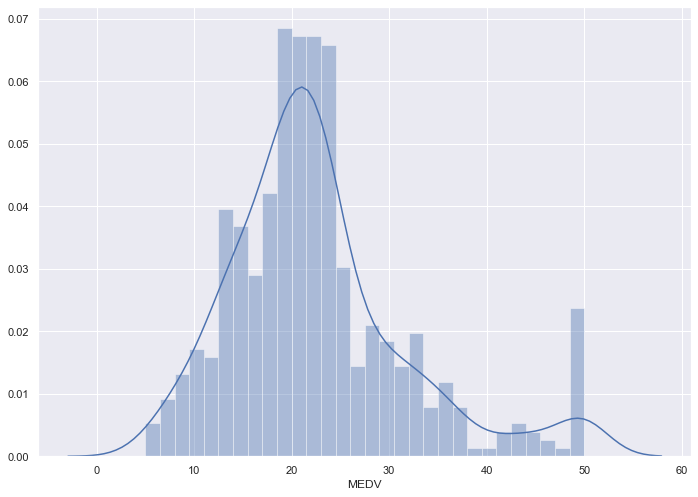

In [7]:
boston_analysis['MEDV'] = boston_dataset.target
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_analysis['MEDV'], bins=30)
plt.show()

### Proceso de aprendizaje

Modelo de regresion lineal simple: $Y = B_{0} + B_{1}X$

Formula para calcular el error cuadratico medio (MCO):  $\beta = (X^{T}X)^{-1}X^{T}$ 
como expresión vectorial

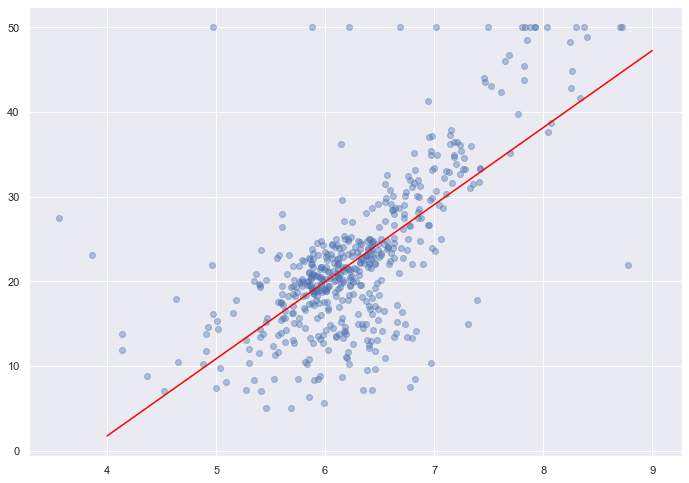

In [8]:
X = np.array(boston_dataset.data[:,5])
Y = np.array(boston_dataset.target)

plt.scatter(X,Y, alpha=0.4)

#Se añade columna de 1 para el termino independiente
X = np.array([np.ones(506),X]).T

B = np.linalg.inv(X.T @ X) @ X.T @ Y


plt.plot([4,9], [B[0] + B[1]*4, B[0] + B[1]*9], c="red")
plt.show()

In [20]:
print(X)
print(B)

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]
[-34.67062078   9.10210898]
